# Experimentos de TE
Donde TE es transferencia de Entropia. 

In [1]:
using HDF5, StatsBase, Statistics,PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

In [2]:
# El de franco que tiene bonito los canales detectados.
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

In [3]:
#arxname="/home/karel/BRWFiles/Isabel2019/Cacho_06_control_02_preproc.h5"

In [4]:
arx=h5open(arxname)
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [5]:
canales=read(arx["CanalesBuenos"])
malos=read(arx["CanalesMalos"])
#lfp=read(arx["dset"]);
lfp=read(arx["LFPSaturados"]);
#freq=read(arx["SamplingRate"])/1000
freq=read(arx["freq"])

dd=size(lfp)
if length(dd)==2
    nmax=dd[2]
    lfp=reshape(lfp, 64,64,nmax)
end
nmax=size(lfp,3)
typeof(lfp)

Array{Float32,3}

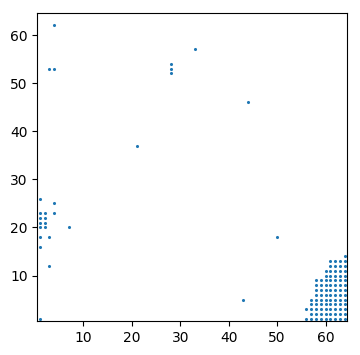

PyObject <matplotlib.collections.PathCollection object at 0x7f58a6ada4a8>

In [6]:
ff=figure(figsize=(4,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
# Isabel Nuevos
#scatter(canales[:,3], canales[:,2], s=0.5)
#Franco Viejos
scatter(malos[:,2], malos[:,1], s=1.5)

In [7]:
mm=rowstoset(malos)
nomalos=zeros(4096,2)
for j=1:64, k=1:64
    nomalos[(j-1)*64+k,1]=j
    nomalos[(j-1)*64+k,2]=k
end
nomm=rowstoset(nomalos)
setdiff!(nomm, mm)

Set(Array{Int64,2}[[47 24], [63 20], [29 33], [35 60], [28 53], [64 33], [52 12], [53 55], [62 18], [12 47]  …  [47 27], [50 42], [13 54], [56 47], [29 17], [14 60], [22 42], [51 38], [35 63], [15 13]])

In [8]:
lfpchorizo=[0]

for q in nomm
    j=q[1]
    k=q[2]
    lfpex=vec(lfp[j,k,:])
    lfpchorizo=vcat(lfpchorizo, lfpex)
end


In [9]:
lfpmean=zeros(nmax)
n=0
for q in nomm
    j=q[1]
    k=q[2]
    lfpex=vec(lfp[j,k,:])
    lfpmean.+=lfpex
    n+=1
end
lfpmean./=n;

In [49]:
lfpsubbuenos=Dict{Any, Array}()
todo=1:5:size(canales,1)

for pieza in todo[1:end-1]
    rang=pieza:pieza+5
    aux=[0]
    for q in rang
    j=canales[q,1]
    k=canales[q,2]
    lfpex=vec(lfp[j,k,:])
    aux=vcat(aux, lfpex)
    end
    lfpsubbuenos[rang]=aux[2:end]
end

In [50]:
length(lfpsubbuenos)

209

In [40]:
function dictarrayordenado(dd::Dict)
    llaves=sort(collect(keys(dd)))
    nnll=length(llaves)
    result=zeros(nnll,2)
    for k in 1:nnll
        result[k,1]=llaves[k]
        result[k,2]=dd[llaves[k]]
    end
    #result=result[sortperm(result[:, 1]), :]
    return result
end

dictarrayordenado (generic function with 1 method)

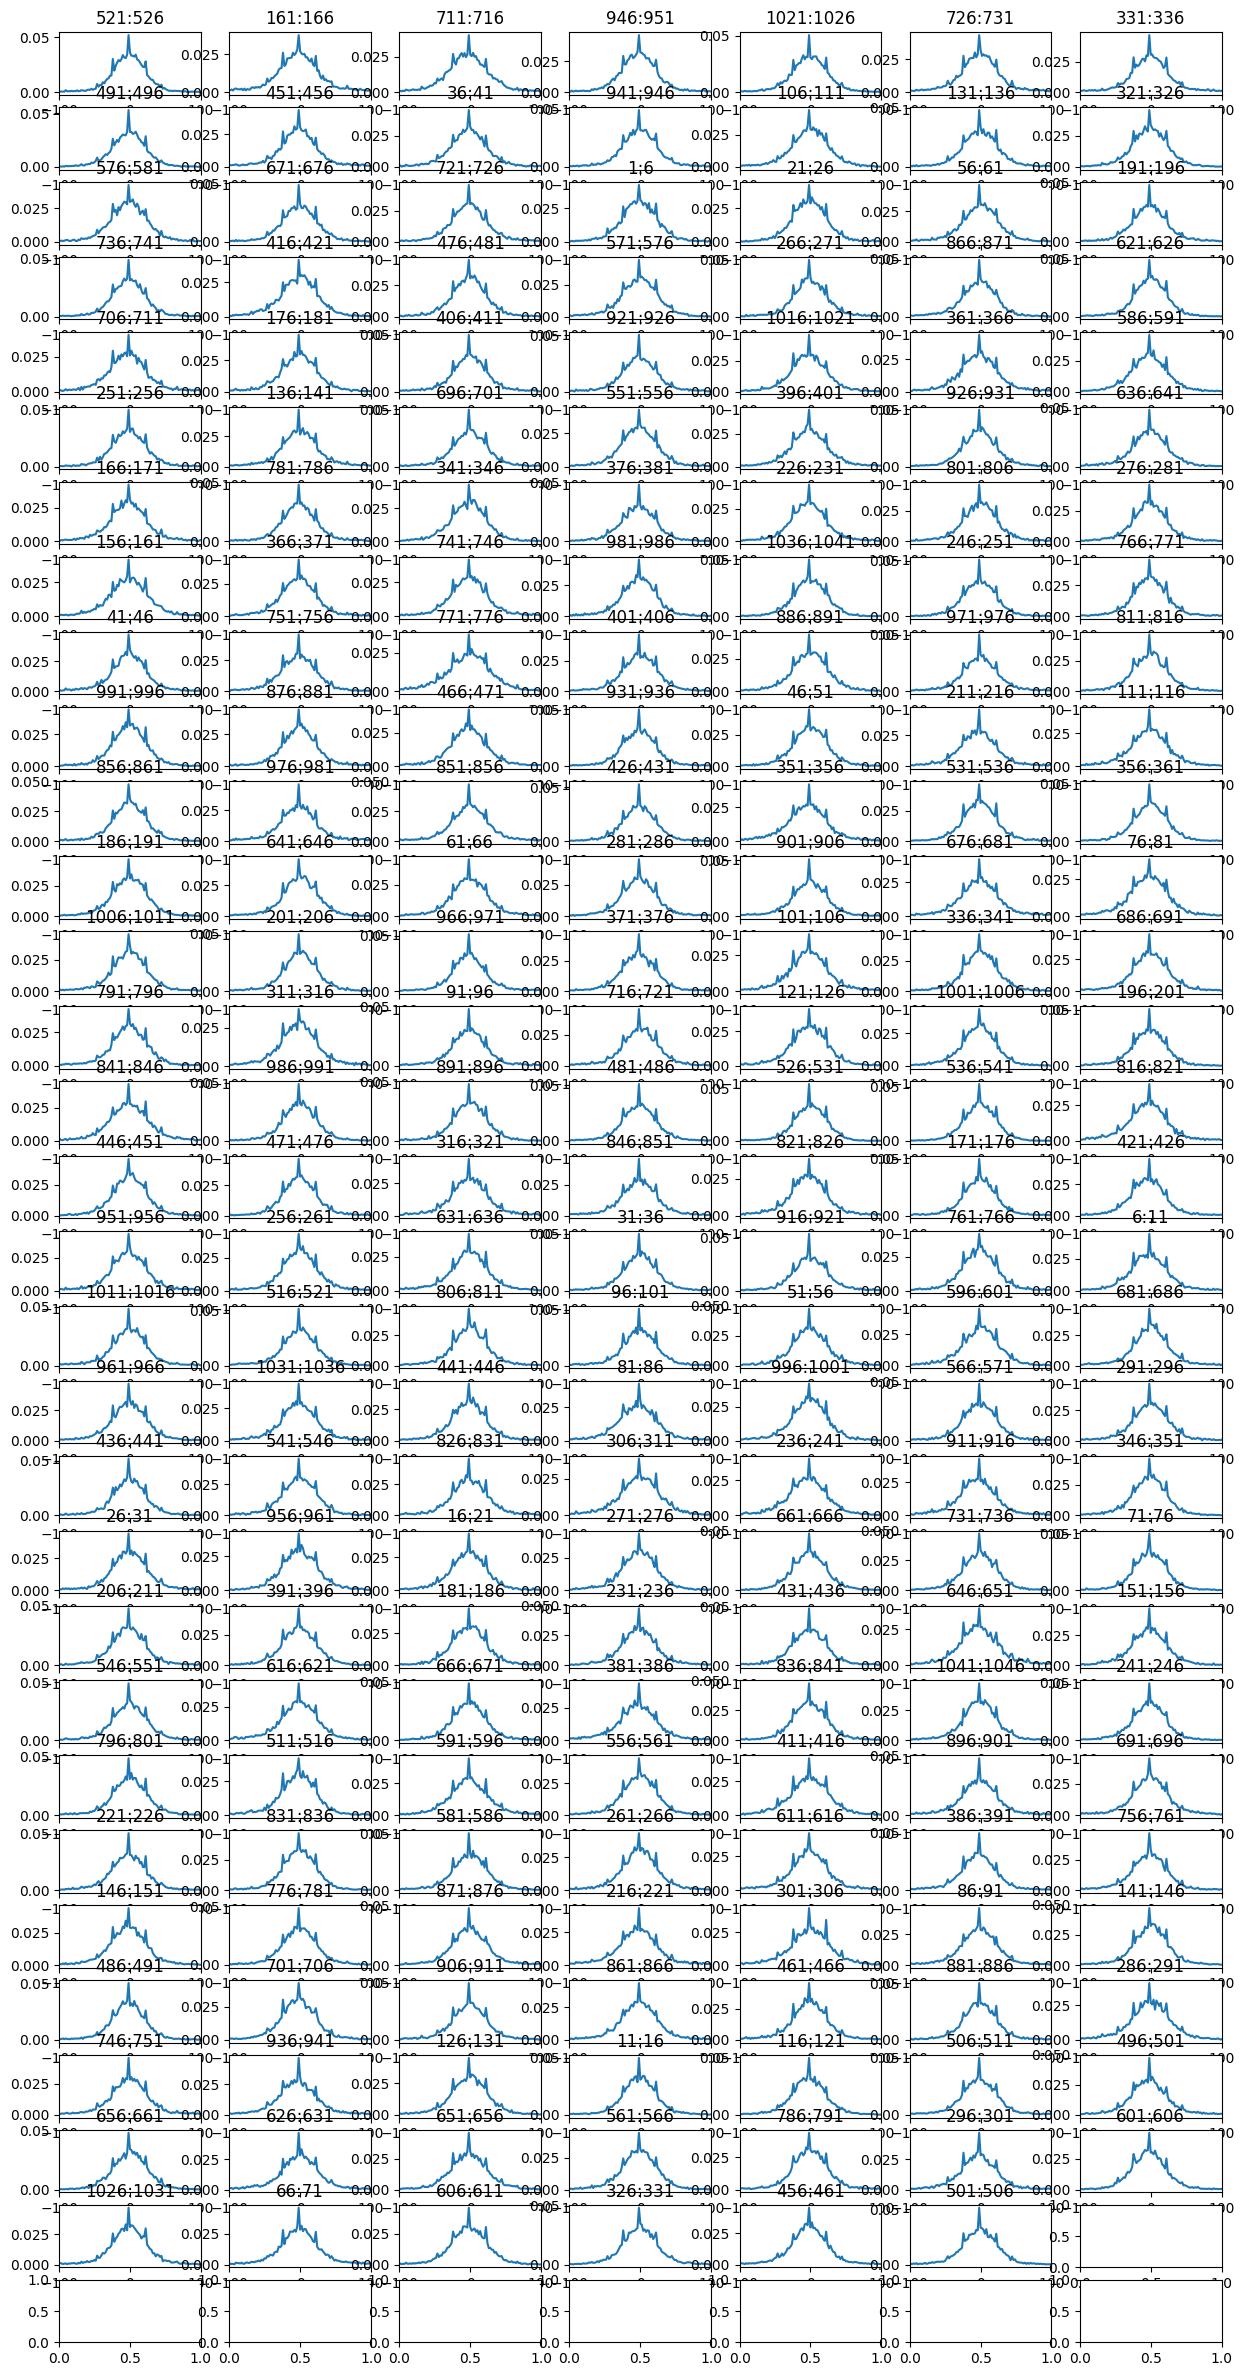

209

In [54]:
fig, supp=subplots(31,7, figsize=(15,30))

k=0

for ke in keys(lfpsubbuenos)
    (j,l)=(divrem(k,7)).+1
    #println(j," ",  l)
    
    mm=countmap(lfpsubbuenos[ke])
    ddd=dictarrayordenado(mm)
    ddd[:,2]=ddd[:,2]./sum(ddd[:,2])
    supp[j,l].set_xlim(-100,100)
    supp[j,l].plot(ddd[:,1], ddd[:,2])
    supp[j,l].set_title("$ke")
    
    k+=1
end
print(k)

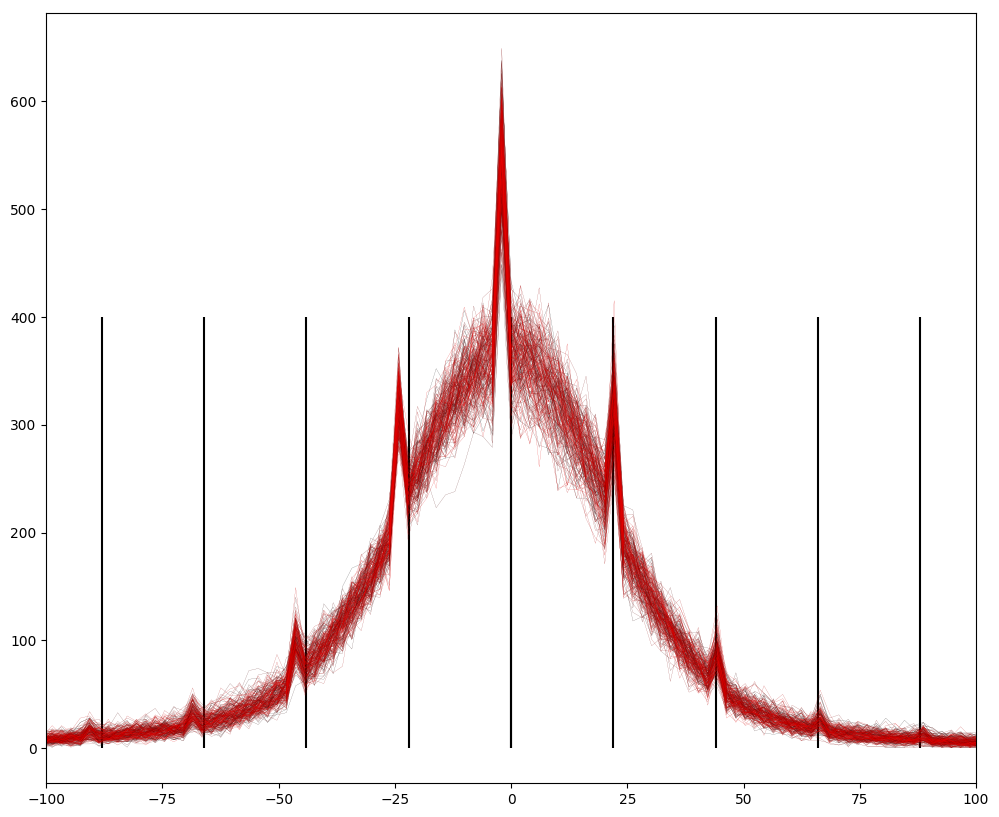

209

In [70]:
firo=figure(figsize=(12,10))

xlim(-100,100)
  
k=0
for ke in keys(lfpsubbuenos)
    mm=countmap(lfpsubbuenos[ke])
    ddd=dictarrayordenado(mm)
  #  ddd[:,2]=ddd[:,2]./sum(ddd[:,2])
    plot(ddd[:,1], ddd[:,2], lw=0.1, c=(k/210,0,0))
    
    k+=1
end
for bla=0:22:100
vlines(-bla,0,400)
vlines(bla,0,400)
end
print(k)

In [11]:
mean(lfpsubbuenos), std(lfpsubbuenos), iqr(lfpsubbuenos)

(-1.8787115f0, 58.424725f0, 36.2548828125)

In [10]:
mean(lfpchorizo), std(lfpchorizo), iqr(lfpchorizo)

(-1.5094328f0, 35.0429f0, 30.21240234375)

In [11]:
mean(lfpmean), std(lfpmean), iqr(lfpmean)

(-1.5094330838709866, 6.699117754488354, 8.663318420241424)

In [12]:
extrema(lfpmean),extrema(lfpchorizo)

((-24.303558035153305, 23.874808687994786), (-1621.3989f0, 4122.986f0))

In [32]:
cmptodos=countmap(lfpchorizo)
cmpbuenos=countmap(lfpchorizobuenos);

In [49]:
dtodos=dictarrayordenado(cmptodos)
dbuenos=dictarrayordenado(cmpbuenos);
dtodos[:,2]=dtodos[:,2]./sum(dtodos[:,2])
dbuenos[:,2]=dbuenos[:,2]./sum(dbuenos[:,2])


1123-element Array{Float64,1}:
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 ⋮                    
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 4.7619024943321456e-7
 2.3809512471660728e-5

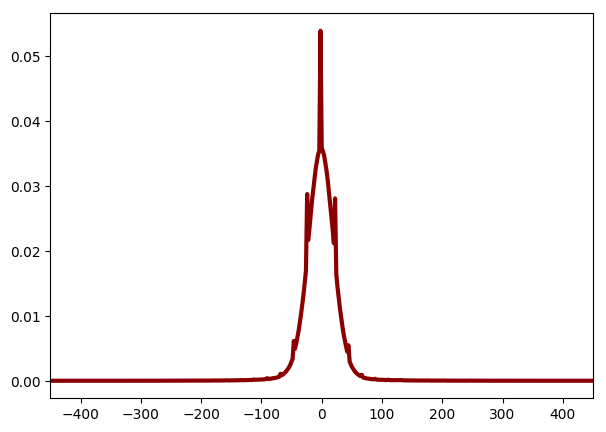

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff6a7e590b8>

In [86]:
figure(figsize=(7,5))
xlim(-450,450)
#for k=1:30

  #   plot(dbuenos[:,1], dbuenos[:,2].+k*0.0002, lw=0.3, c=(k/30,0,0))
#end
plot(dtodos[:,1], dtodos[:,2], lw=3, c="darkred")


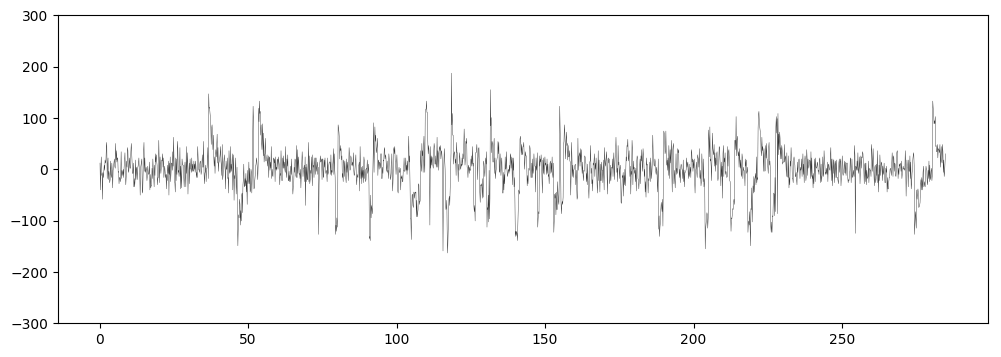

4 32 bla

In [111]:
figi=figure(figsize=(12,4))

ylim(-300,300)



#for q in 1:size(canales,1)
rau=25
rango=(5:5).+rau
for q in rango

    j=canales[q,1]
    k=canales[q,2]
    lfpex=vec(lfp[j,k,:])
    tiempo=(1:nmax)./freq
    plot(tiempo,lfpex, lw=0.3, c=(0.2,0.2,0.2))
    print(j, " ", k, " bla")
end
#figi.patch.set_facecolor("xkcd:salmon")
#figi.patch.set_facecolor((1.0, 0.47, 0.42))

In [87]:
size(canales,1)

1050

In [13]:
function renormvec(datos::Array)
    mu=mean(datos)
    result=datos.-mu
    sig=std(result)
    if sig !=0
    result=result./sig
    end
    return result
end

renormvec (generic function with 1 method)

In [14]:
cbrt(2000)

12.599210498948732

In [15]:
lfprn=zeros(size(lfp))
for j=1:64, k=1:64
    lfprn[j,k,:]=renormvec(lfp[j,k,:])
end

In [16]:
yxref=[39,40]
# okey menso a barreconjunto le tienes que pasar solo las columnas con coordenadas!!!
orderchans=barreconjuntoyordena(canales[:,1:2], yxref);

alfamin = 0.015623728620476831


In [17]:
v=orderchans[:,2].==40
orderchans[v,:]

19×3 Array{Int64,2}:
 51  40   408
 50  40   409
 49  40   410
 47  40   411
 46  40   412
 64  40   413
 63  40   414
 62  40   415
 61  40   416
 60  40   417
 59  40   418
 58  40   419
 57  40   420
 56  40   421
 55  40   422
 54  40   423
 53  40   424
 52  40   425
  7  40  1019

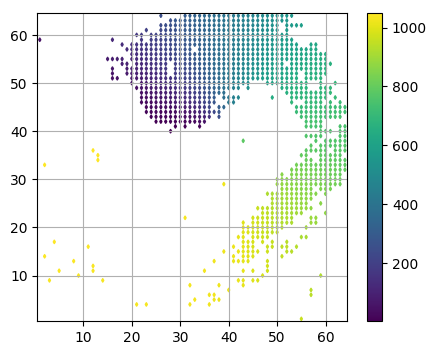

In [18]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
#scatter(canales[:,2], canales[:,1], s=0.5)
scatter(orderchans[:,2], orderchans[:,1], marker="d",s=3, cmap="viridis", c=orderchans[:,3])
colorbar()
grid()

In [19]:
ejemplos=([58,30], [56,41], [54,36],[14,40])

([58, 30], [56, 41], [54, 36], [14, 40])

In [20]:
function freediaconisbin(datos)
    # Freedman and Diaconis
    n=length(datos)
    m=iqr(datos)
    result=2*m/cbrt(n)
    return result
end

function scottbin(datos)
    n=length(datos)
    m=std(datos)
    result=3.49*m/cbrt(n)
end

function sqrbin(datos)
    n=length(datos)
    sq=sqrt(n)
    (mir,mar)=extrema(datos)
    result=(mar-mir)/sq
end

function mejorbin(datos; deltax=1)
    # estas asumiendo que los datos se ven bastante gaussianos!
    # y que estan discretizados en pasos deltax

    (fd, sb, sq)=(freediaconisbin(datos), scottbin(datos), sqrbin(datos))
    bines=[fd, sb, sq, sig]
    nombins=["fd", "sb", "sq", "sig"]
    # pa debuquear
    bines=[sq]
    nombins=["sq"]
    
    masquedx=bines[bines.>deltax]
    nommas=nombins[bines.>deltax]
    if isempty(masquedx)
        result=("dd", deltax) 
    else 
        aver=findmin(masquedx)
        elbueno=nommas[aver[2]]
        elbuenon=aver[1]
       result=(elbueno, elbuenon)
    end
    return result
end

function fuu(x::String)
    result=0
    if x=="dd"
        result=0
    elseif x=="fd"
        result=1
    elseif x=="sb"
        result=2
    elseif x=="sq"
        result=3
    elseif x=="sig"
        result=4
    end
    return result
end

fuu (generic function with 1 method)

In [21]:
function histoptimo(datos::Array; deltax=1)
    bine=mejorbin(datos, deltax=deltax)
    (vmin,vmax)=extrema(datos)
    rango=vmin:bine:vmax+bine
    result=fit(Histogram, datos,rango)
end

function histobin(datos::Array; deltax=1, method="none")
  
    if method=="none"
        bin=deltax
    elseif method=="fd"
        bin=freediaconisbin(datos)
   elseif method=="sb"
        bin=scottbin(datos)
    elseif method=="sq"
        bin=sqrbin(datos)
    end
    
    if bin==0
        bin=deltax
    end
    (vmin, vmax)=extrema(datos)
    rango=vmin:bin:vmax+bin
    h=fit(Histogram, datos, rango)
    result=(bin,h)
end

function histoheuristic(datos::Array, bin=4.7)
    vmin,vmax=(-2000,2000)
    n=length(datos)
    rango=vmin:bin:vmax+bin
    h=fit(Histogram, datos, rango)
    result=(bin,h)
end




histoheuristic (generic function with 2 methods)

In [24]:
entrocountmap=zeros(64,64)
ncountmap=zeros(64,64)

for j=1:64,k=1:64
    dict=countmap(lfp[j,k,:])
    valores=values(dict)
    pesos=valores./sum(valores)
    entrocountmap[j,k]=entropy(pesos)
    ncountmap[j,k]=length(valores)
end

In [23]:

comparaentropias=zeros(64,64,4)
metos=["fd", "sb", "sq", "heu"]
bines=[0,0,0,0]

for m in 1:3
    metodo=metos[m]
    for j=1:64,k=1:64
        lfpex=vec(lfp[j,k,:])
     #   println("$j, $k, $metodo")
        hhh=histobin(lfpex, method=metodo)
        hwei=hhh[2].weights./sum(hhh[2].weights)
        comparaentropias[j,k,m]=entropy(hwei)
    end
end

m=4
metodo=metos[m]
    for j=1:64,k=1:64
        lfpex=vec(lfp[j,k,:])
        hhh=histoheuristic(lfpex)
        sumum=sum(hhh[2].weights)
        if sumum!=0
        hwei=hhh[2].weights./sumum
        else
        hwei=hhh[2].weights
        end
        comparaentropias[j,k,m]=entropy(hwei)
    end

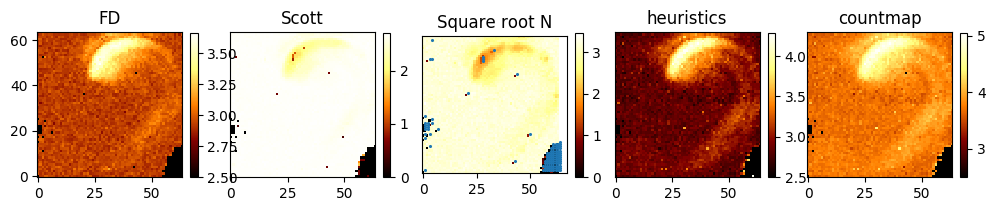

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff6d1fa5748>

In [25]:
fig, (uno, dos, tres, cuatro, cinco)=subplots(1,5, figsize=(12,4))

aa=uno.imshow(comparaentropias[:,:,1], origin="lower", cmap="afmhot", vmin=2.5)
uno.set_title("FD")
colorbar(aa, ax=uno, fraction=0.045)
bb=dos.imshow(comparaentropias[:,:,2], origin="lower",  cmap="afmhot")
dos.set_title("Scott")
dos.set_yticks([])
colorbar(bb, ax=dos, fraction=0.045)
cc=tres.imshow(comparaentropias[:,:,3], origin="lower",  cmap="afmhot")
tres.set_title("Square root N")
tres.set_yticks([])
tres.scatter(malos[:,2], malos[:,1], s=1.5)
colorbar(cc, ax=tres, fraction=0.045)

dd=cuatro.imshow(comparaentropias[:,:,4], origin="lower",  cmap="afmhot", vmin=2.5)
cuatro.set_title("heuristics")
cuatro.set_yticks([])
colorbar(dd, ax=cuatro, fraction=0.045)

dd=cinco.imshow(entrocountmap, origin="lower",  cmap="afmhot", vmin=2.5)
cinco.set_title("countmap")
cinco.set_yticks([])
colorbar(dd, ax=cinco, fraction=0.045)


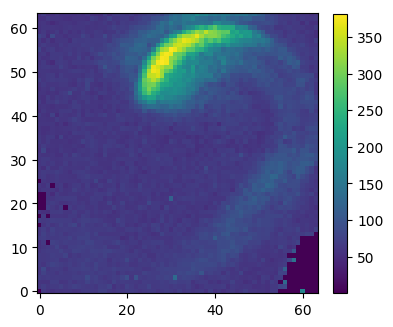

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff6cdc4b208>

In [27]:
ff=figure(figsize=(4,4))
ncuo=imshow(ncountmap, origin="lower")
colorbar(ncuo, fraction=0.045)

In [77]:
lfpex=vec(lfp[5,62,:])
hmalo=histoheuristic(lfpex)[2]
entropy(hmalo.weights)

0

search: entropy crossentropy renyientropy comparaentropias ArgumentError



```
entropy(p, [b])
```

Compute the entropy of a collection of probabilities `p`, optionally specifying a real number `b` such that the entropy is scaled by `1/log(b)`. Elements with probability 0 or 1 add 0 to the entropy.


In [38]:
vernn= fuu.(vernombres)

64×64 Array{Int64,2}:
 4  1  1  2  2  2  1  1  1  1  1  1  1  …  2  1  3  0  0  0  0  0  3  0  0  0
 2  1  1  1  1  1  1  1  1  1  1  1  1     2  1  1  3  3  0  0  0  0  0  0  0
 2  1  2  1  3  1  2  1  1  1  1  3  1     1  1  1  0  3  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  3  1     1  1  1  1  0  0  0  0  0  0  0  0
 1  3  1  1  1  1  1  1  1  2  1  1  1     2  1  2  1  3  0  0  0  0  0  0  0
 1  3  1  1  1  1  1  1  1  3  3  1  1  …  1  1  1  1  1  0  0  0  0  0  0  0
 1  2  1  3  1  1  1  1  1  1  1  1  1     1  1  1  1  1  0  0  0  0  0  0  0
 1  1  1  1  3  1  1  1  1  1  1  1  1     1  2  1  1  1  3  3  0  0  0  0  0
 1  1  3  3  1  1  1  2  1  1  1  1  1     1  1  2  1  1  0  0  0  0  0  0  0
 1  1  3  1  1  3  1  1  3  1  1  3  1     1  1  1  1  1  1  1  0  0  0  0  0
 2  1  1  3  3  1  1  1  1  1  1  3  3  …  2  1  1  3  1  2  1  0  0  0  0  0
 2  2  0  1  1  1  1  1  1  1  1  3  1     2  1  1  1  1  1  1  3  4  0  0  0
 1  1  1  1  1  1  1  3  1  3  1  3  1    

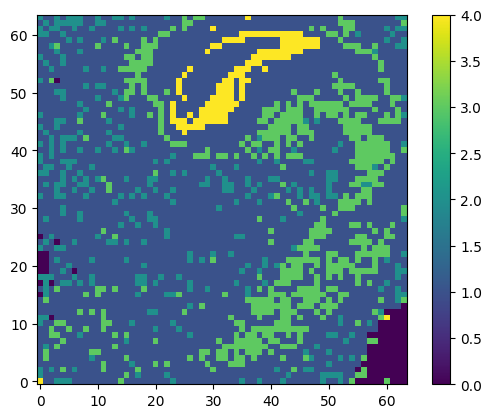

PyObject <matplotlib.colorbar.Colorbar object at 0x7f88d7f87860>

In [40]:
imshow(vernn, origin="lower")
colorbar()

In [48]:
median(verbines[vernombres.=="sig"]), median(verbines[vernombres.=="sb"]),
    median(verbines[vernombres.=="sq"]), median(verbines[vernombres.=="fd"])

(5.076189279556274, 5.065356450968757, 4.4587610366771315, 4.476191931209156)

In [21]:
function sacaentropia1d(datos::Array; deltax=1)
    hh=histoptimo(datos, deltax=deltax)
    pdfs=hh.weights./sum(hh.weights)
    result=entropy(pdfs)
end

sacaentropia1d (generic function with 1 method)

In [22]:
hetas=zeros(64,64)

for j=1:64,k=1:64
    lfpex=vec(lfp[j,k,:])
    hetas[j,k]=sacaentropia1d(lfpex, deltax=2.02)
end

In [36]:
imshow(hetas, origin="lower", vmin=3)
colorbar()
title()

UndefVarError: UndefVarError: hetas not defined

In [24]:
function binsize2d(datosx::Array, datosy::Array; deltax=1, deltay=1)
    if length(datosx)!=length(datosy)
        error("Solo puedo lidiar con datos de la misma longitud")
    end
    
    nn=length(datosx)
    
    minx,maxx=extrema(datosx)
    miny,maxy=extrema(datosy)
    
    rx=maxx-minx
    ry=maxy-miny
    sq=[rx,ry]./(nn^(1/4))
    
    sigx,sigy= std(datosx), std(datosy)
    sc=[sigx,sigy].*(3.49/(nn^(1/6)))

    iqx, iqy= iqr(datosx), iqr(datosy)
    fd=[iqx, iqy].*(2/nn^(1/6))
    
    bines=[sq, sc, fd]
    areas=map(x->prod(x), bines)
    
    losbuenos=areas.>deltax*deltay
    
    areasmayores=areas[losbuenos]
    binesdepurados=bines[losbuenos]
   
    if !isempty(areasmayores)
        index=findmin(areasmayores)[2]
        result=binesdepurados[index]
    else
        result=[deltax,deltay]
    end
    
    return result
end

binsize2d (generic function with 1 method)

In [33]:
function binsize3d(datosx::Array, datosy::Array, datosz::Array; deltax=1, deltay=1, deltaz=1)
    if length(datosx)!=length(datosy) || length(datosx)!=length(datosz)
        error("Solo puedo lidiar con datos de la misma longitud")
    end
    
    nn=length(datosx)
    
    minx,maxx=extrema(datosx)
    miny,maxy=extrema(datosy)
    minz,maxz=extrema(datosy)
    
    rx=maxx-minx
    ry=maxy-miny
    rz=maxz-minz
    sq=[rx,ry, rz]./(nn^(1/6))
    
    sigx,sigy, sigz= std(datosx), std(datosy), std(datosz)
    sc=[sigx,sigy, sigz].*(3.49/(nn^(1/9)))

    iqx, iqy, iqz= iqr(datosx), iqr(datosy), iqr(datosz)
    fd=[iqx, iqy, iqz].*(2/nn^(1/9))
    
    bines=[sq, sc, fd]
    areas=map(x->prod(x), bines)
    
    losbuenos=areas.>deltax*deltay*deltaz
    
    areasmayores=areas[losbuenos]
    binesdepurados=bines[losbuenos]
   
    if !isempty(areasmayores)
        index=findmin(areasmayores)[2]
        result=binesdepurados[index]
    else
        result=[deltax,deltay, deltaz]
    end
    
    return result
end

binsize3d (generic function with 1 method)

In [55]:
lfpx=vec(lfp[51,26,:])
lfpy=vec(lfp[22,30,:])
lfpz=vec(lfp[45,21,:]);

In [56]:
binsize2d(lfpx,lfpy)
binsize3d(lfpx,lfpy,lfpz)

3-element Array{Float64,1}:
 41.54838309197618 
 22.50537417482043 
 27.698922061317454

In [36]:
caralho=zeros(64,64)
for j=1:64, k=1:64
    datos=vec(lfp[j,k,:])
    caralho[j,k]=binsize2d(datos,lfpx)[1]
end

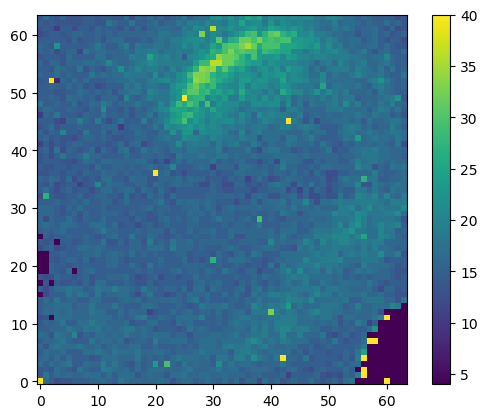

PyObject <matplotlib.colorbar.Colorbar object at 0x7efddaf98dd0>

In [48]:
imshow(caralho,origin="lower",vmin=4, vmax=40)
colorbar()

In [65]:
function histoptimo2d(datosx::Array, datosy::Array; deltax=1, deltay=1)
    bine=binsize2d(datosx, datosy, deltax=deltax, deltay=deltay)
    
    (vxmin,vxmax)=extrema(datosx)
    (vymin,vymax)=extrema(datosy)
    
    rangox=vxmin:bine[1]:vxmax+bine[1]
    rangoy=vymin:bine[2]:vymax+bine[2]
    
    result=fit(Histogram, (datosx, datosy),(rangox, rangoy))
end

function histoptimo3d(datosx::Array, datosy::Array, datosz::Array; deltax=1, deltay=1, deltaz=1)
    bine=binsize3d(datosx, datosy, datosz, deltax=deltax, deltay=deltay, deltaz=deltaz)
    
    (vxmin,vxmax)=extrema(datosx)
    (vymin,vymax)=extrema(datosy)
    (vzmin,vzmax)=extrema(datosz)
    
    rangox=vxmin:bine[1]:vxmax+bine[1]
    rangoy=vymin:bine[2]:vymax+bine[2]
    rangoz=vzmin:bine[3]:vzmax+bine[3]
    
    result=fit(Histogram, (datosx, datosy, datosz),(rangox, rangoy, rangoz))
end

histoptimo3d (generic function with 1 method)

In [66]:
ff=histoptimo3d(lfpx, lfpy,lfpz;deltax=3, deltay=3, deltaz=3)

Histogram{Int64,3,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -942.626953125:41.54838309197618:802.4051367379993
  -70.49560546875:22.50537417482043:64.53663958017259
  -88.623046875:27.698922061317454:77.57048549290471
weights: [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0]

[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
closed: left
isdensity: false

In [68]:
sum(ff.weights)

2000

In [24]:
caralho=Dict{Array, Any}()
for q in ejemplos
    caralho[q]=histofreediaconis(lfp[q[1], q[2], :])
end

1 Base.TwicePrecision{Float64}(0.4607807661920545, 0.0)
159.8500616351135 17.0 [58, 30] 2051.0 0.4607807661920545
1 Base.TwicePrecision{Float64}(0.3523617623821593, 0.0)
13304.115182497977 13.0 [56, 41] 2049.0 0.3523617623821593
1 Base.TwicePrecision{Float64}(0.4065712642871069, 0.0)
11412.924181035947 15.0 [54, 36] 2049.0 0.4065712642871069
1

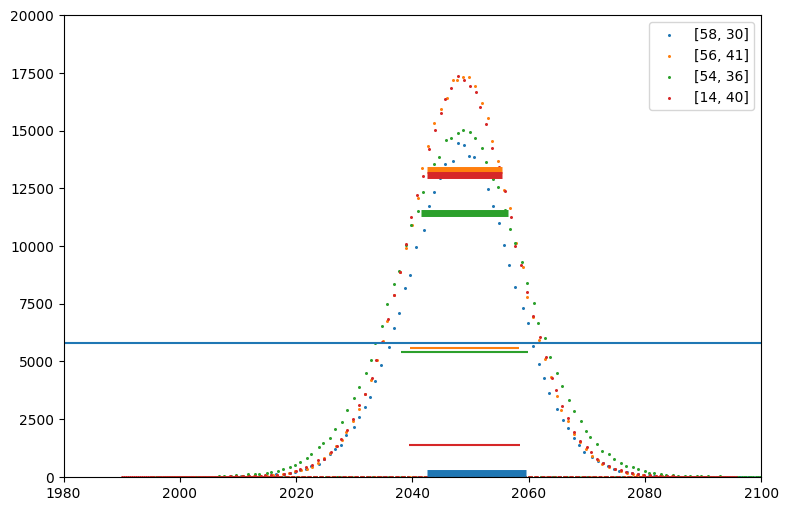

 Base.TwicePrecision{Float64}(0.3523617623821593, 0.0)
13065.98283909582 13.0 [14, 40] 2049.0 0.3523617623821593


PyObject <matplotlib.legend.Legend object at 0x7f63e9d39048>

In [100]:
figure(figsize=(9,6))
xlim(1980,2100)
ylim(-20,2.0*10^4)
for q in ejemplos
     lfpex=vec(lfp[q[1], q[2],:])
      sig=std(lfpex)
    inter=iqr(lfpex)
    mm=median(lfpex)
    
    ff=freediaconis(lfpex)
    
    edg=caralho[q].edges[1][1:end-1]
    ww=caralho[q].weights
    aa=scatter(edg,ww, label="$q", s=1.4)
    l=caralho[q].edges[1].step
    println(1, " ", l)
    
    altura=exp(-0.25)/(sig*sqrt(2*pi))
    
    colore=aa.get_facecolors()
    ylin=100*q[1]
    hlines(ylin,mm-sig, mm+sig, color=colore)
    
    ylin2=altura*nmax
    hlines(ylin2, mm-inter/2, mm+inter/2, color=colore, lw=5)
    println(ylin2, " ", inter, " ", q, " ", mm, " ", ff)
end
legend()

In [107]:
for q in ejemplos
    lfpex=vec(lfp[q[1], q[2],:])
    sig=std(lfpex)
    inter=iqr(lfpex)
    mm=median(lfpex)  
    ff=freediaconisbin(lfpex)
    ss=scottbin(lfpex)
    sq=sqrbin(lfpex)
    println(q, " ", sig, " ", inter, " ", mm, " ", ff ,  " ", ss, " ", sq)
end

[58, 30] 780.8675233622242 17.0 2051.0 0.4607807661920545 36.93330845957613 3.3052717032174175
[56, 41] 9.382188896148257 13.0 2049.0 0.3523617623821593 0.44375680401644035 0.14830336043075762
[54, 36] 10.936874700851641 15.0 2049.0 0.4065712642871069 0.5172900073639164 0.18143496222911837
[14, 40] 9.553182739902311 13.0 2049.0 0.3523617623821593 0.4518444350000733 0.1672357043155352


[58, 30] 780.8675233622242 17.0
[56, 41] 9.382188896148257 13.0
[54, 36] 10.936874700851641 15.0


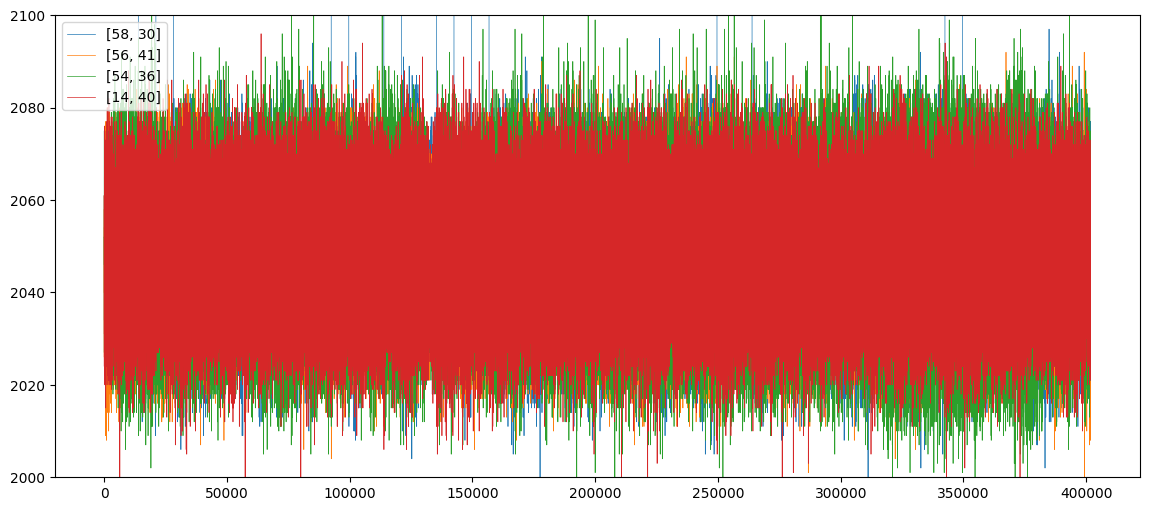

[14, 40] 9.553182739902311 13.0


PyObject <matplotlib.legend.Legend object at 0x7f63eb2da320>

In [54]:
figure(figsize=(14,6))
ylim(2000,2100)
for q in ejemplos
    lfpex=vec(lfp[q[1], q[2],:])
    rangg=collect(1:nmax)
    plot(rangg, lfpex, lw=0.5, label="$q")
    sig=std(lfpex)
    inter=iqr(lfpex)
    println(q, " ", sig, " ", inter)
end
legend()

In [15]:
uno=sum(rr3.weights, dims=[1,3])
otro=rryy.weights
vec(uno)==otro
(typeof(uno), typeof(otro))

(Array{Int64,3}, Array{Int64,1})

In [16]:
fururu=[rrr.edges[2][1], rrr.edges[2][end], rrr.edges[1][1], rrr.edges[1][end]]
f9=[0,1,0,1]
imshow(rrr.weights./sum(rrr.weights), extent=fururu, origin="lower", interpolation="nearest")
colorbar()
#scatter(yy,xx, c="red", s=1)

UndefVarError: UndefVarError: rrr not defined

In [17]:
function transferentropyfd(yyfuture::Array, yypast::Array, xxpast::Array)
    hfd=histofreediaconis(yyfuture,yypast,xxpast)
    pesos=hfd.weights./sum(hfd.weights)
    #checa que conserva su "dimensionalidad" en los indices
    pypast=sum(pesos, dims=[1,3])
    pypastxpast=sum(pesos, dims=1)
    pyfutpypast=sum(pesos, dims=3)

    (KK,LL,MM)=size(pesos)
    
    sumatum=0
    
    for k=1:KK, l=1:LL, m=1:MM
        aux1=pesos[k,l,m]*pypast[1,l,1]
        aux2=pypastxpast[1,l,m]*pyfutpypast[k,l,1]
        if aux1 !=0  && aux2 !=0
            aux3=log(aux1/aux2)
            sumatum+=pesos[k,l,m]*aux3
        end
    end
    
    return sumatum
    
end


transferentropyfd (generic function with 1 method)

In [18]:
tau=round(Int, 5*freq)
xx=lfp[56,30,:]
yy=lfp[56,40,:]
xf=xx[tau:end]
xp=xx[1:end-tau+1]
yp=yy[1:end-tau+1]
transferentropyfd(xf,xp,yp)

1.2312138905946999

In [19]:
rrr=histofreediaconis(xx,yy)
rx=sum(rrr.weights, dims=2)
ry=sum(rrr.weights, dims=1)

1×86 Array{Int64,2}:
 2  0  1  2  1  1  1  1  1  4  1  3  2  …  0  3  2  1  0  1  0  1  1  1  0  2

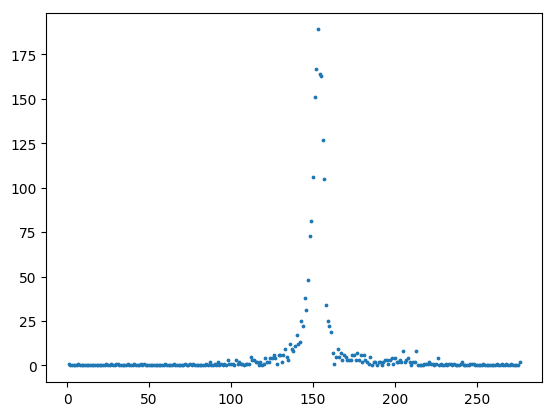

PyObject <matplotlib.collections.PathCollection object at 0x7fd578518c88>

In [20]:
scatter(1:length(rx),vec(rx), s=3)

In [68]:
function histocountmap(xxs::Array)
    dicto=countmap(xxs)
    ll=length(dicto)
    bla=zeros(ll,2)
    j=1
    for k in sort(collect(keys(dicto)))
        bla[j,1]=k
        bla[j,2]=dicto[k]
        j+=1
    end
    return bla
end

function histocountmap(xxss::Array...)
    valores=collect(zip(xxss...))
    dicto=countmap(valores)
    ll=length(dicto)
    tantas=length(xxss)
    bla=zeros(ll, tantas+1)
    j=1
    for k in sort(collect(keys(dicto)))
        for l in 1:tantas
            bla[j,l]=k[l]
        end
        bla[j,tantas+1]=dicto[k]
        j+=1
    end
    return bla
end

LoadError: syntax: incomplete: "function" at none:1 requires end

In [72]:
rangg=250:1500
xxpas=xx[rangg]
yypas=yy[rangg]
yyfut=yy[rangg.+28];

In [76]:
haha=histocountmap(yyfut,yypas,xxpas)
countmap(haha[:,end])

Dict{Float64,Int64} with 2 entries:
  2.0 => 4
  1.0 => 1243

In [22]:
function entrocountmap(xxs::Array)
    cuentas=histocountmap(xxs)
    pdfval=cuentas[:,2]./sum(cuentas[:,2])
    suma=0
    for j in pdfval
        suma+=j*log(j)
    end
    return (-suma)
end

function entrocountmap(xxss::Array...)
    cuentas=histocountmap(xxss...)
    #ligeramente diferente ¿sera generalizable?
    pdfval=cuentas[:,end]./sum(cuentas[:,end])
    suma=0
    for j in pdfval
        suma+=j*log(j)
    end
    return (-suma)
end


entrocountmap (generic function with 2 methods)

In [ ]:
function transferentropycm(yyfuture, yypast, xxpast)
    hcm=histocountmap(yyfuture,yypast,xxpast)
    pesos=hcm[:,end]
    pesos=pesos./sum(pesos)
    #checa que conserva su "dimensionalidad" en los indices
    pypast=histocountmap(yypast)
    pypastxpast=histocountmap(yypast,xxpast)
    pyfutpypast=histocountmap(yyfuture,yypast)
    
    

    (KK,LL,MM)=size(pesos)
    
    sumatum=0
    
    for k=1:KK, l=1:LL, m=1:MM
        aux1=pesos[k,l,m]*pypast[1,l,1]
        aux2=pypastxpast[1,l,m]*pyfutpypast[k,l,1]
        if aux1 !=0  && aux2 !=0
            aux3=log(aux1/aux2)
            sumatum+=pesos[k,l,m]*aux3
        end
    end
    
    return sumatum
    


end

In [23]:
fu=histocountmap(xx,yy)
bar=entrocountmap(xx,yy)

7.258144577604487

In [25]:
fufu=fu[fu[:,3].>2,:]
typeof(fufu)

Array{Float64,2}

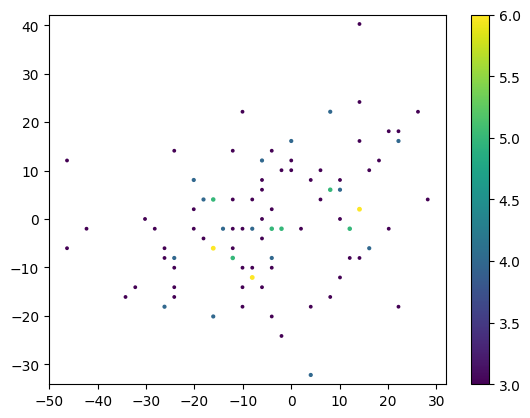

(-50.053800503667674, 31.926359097417667, -35.85500884745723, 43.91128698707785)

In [26]:
eqs=fufu[:,1]
yes=fufu[:,2]
siz=fufu[:,3]
scatter(eqs,yes, s=siz, c=siz)
colorbar()
axis("equal")

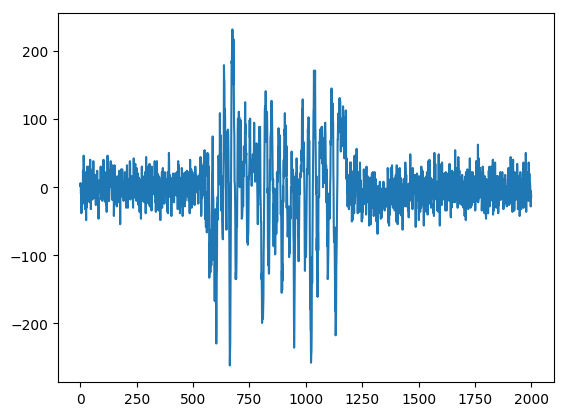

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5767bdf60>

In [27]:
plot(yy)

In [28]:
hetasfd=zeros(64,64)
hetascm=zeros(64,64)
for j=1:64, k=1:64
    ejemplo=lfp[j,k,:]
    hetasfd[j,k]=sacaentropiafd(ejemplo)
    hetascm[j,k]=entrocountmap(ejemplo)
end


In [29]:
dh=hetasfd-hetascm;
#map!(x->round(x ;digits=3), dh)

64×64 Array{Float64,2}:
 -0.00430033  -0.828288  -0.721642  …   0.0        0.0        0.0     
 -0.645778    -0.949897  -0.725919      0.0        0.0        0.0     
 -0.655579    -0.727874  -0.656125      0.0        0.0        0.0     
 -0.873623    -0.722449  -0.883149      0.0        0.0        0.0     
 -0.809698    -0.879922  -0.726231      0.0        0.0        0.0     
 -0.736013    -0.870958  -0.80382   …   0.0        0.0        0.0     
 -0.801438    -0.650344  -0.86598       0.0        0.0        0.0     
 -0.725109    -0.795596  -0.802805      0.0        0.0        0.0     
 -0.868443    -0.815723  -0.648623      0.0        0.0        0.0     
 -0.742314    -0.729287  -0.814583      0.0        0.0        0.0     
 -0.654961    -0.798873  -0.742495  …   0.0        0.0        0.0     
 -0.593115    -0.645372   0.0           0.0        0.0        0.0     
 -0.7153      -0.884071  -0.793444      0.0        0.0        0.0     
  ⋮                                 ⋱                

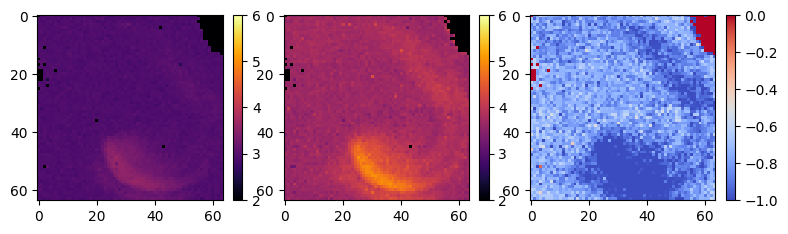

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd576608f28>

In [30]:
fig, (uno, dos, tres)=subplots(1,3, figsize=(9,4))
bmin=2
bmax=6
fafa=uno.imshow(hetasfd, origin="upper", cmap="inferno", vmin=bmin, vmax=bmax)
colorbar(fafa, ax=uno, fraction=0.045)
fufu=dos.imshow(hetascm, origin="upper", cmap="inferno", vmin=bmin, vmax=bmax)
colorbar(fufu, ax=dos, fraction=0.045)
fefe=tres.imshow(dh, origin="upper", cmap="coolwarm", vmin=-1, vmax=0)
colorbar(fefe, ax=tres, fraction=0.045)


In [31]:
mean(hetascm)

3.7399459847198226

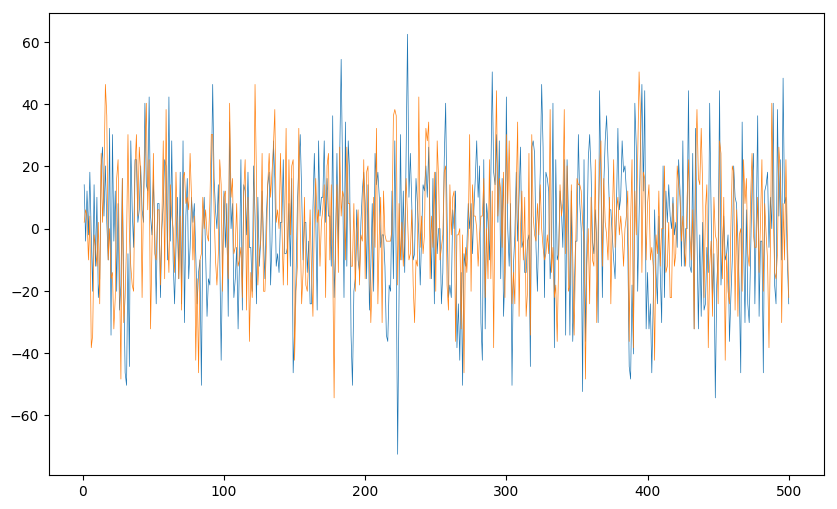

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd57680e2e8>

In [32]:
f=figure(figsize=(10,6))
rang=1:5*10^2
plot(rang,xx[rang], lw=0.5)
plot(rang,yy[rang], lw=0.5)

In [33]:
vallfpdisc=zeros(64,64)
hfdiacounts=zeros(64,64)
iqrs=zeros(64,64)
for j=1:64, k=1:64
    haux=0
    try
        haux=histofreediaconis(lfp[j,k,:])
          hfdiacounts[j,k]=length(haux.edges[1])
    catch e
    end
    iqrs[j,k]=iqr(lfp[j,k,:])
  
    vallfpdisc[j,k]=length(countmap(lfp[j,k,:]))
end

In [34]:
iqr(vec(iqrs))
mean(vec(iqrs))
mode(vec(iqrs))


26.18408203125

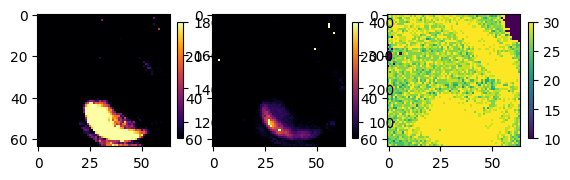

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd5764e3b38>

In [35]:
figure(figsize=(12,8))
fig, (uno, dos,tres)=subplots(1,3)
fafa=uno.imshow(vallfpdisc, origin="upper", vmin=110, vmax=180, cmap="inferno")
colorbar(fafa, ax=uno, fraction=0.04)
fufu=dos.imshow(hfdiacounts, origin="upper", vmin=50, vmax=400, cmap="inferno")
colorbar(fufu, ax=dos, fraction=0.04)
fefe=tres.imshow(iqrs, vmin=10,vmax=30)
colorbar(fefe, ax=tres, fraction=0.04)


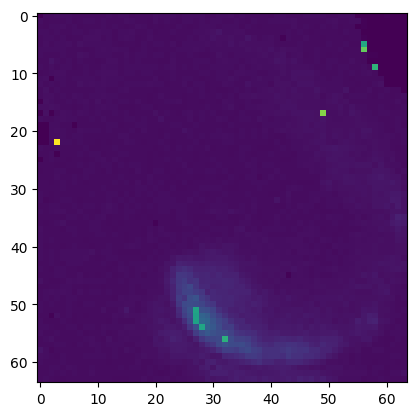

PyObject <matplotlib.image.AxesImage object at 0x7fd57640dcc0>

In [36]:
imshow(hfdiacounts)

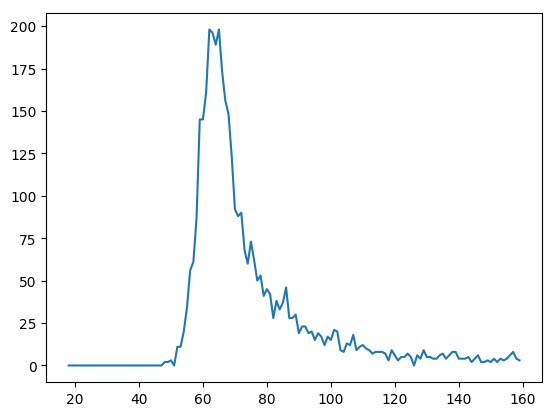

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5763f4320>

In [37]:
vv=vec(vallfpdisc)
ll=length(countmap(vv))
jhh=fit(Histogram, vv, 18:160)
ta=jhh.weights
tu=jhh.edges[1]
size(collect(tu[1:end-1])), size(ta)
plot(tu[1:end-1], ta)

In [38]:
typeof(vv)

Array{Float64,1}

In [55]:
function sacaentropiafd(datosX::Array, datosY::Array)
    # ambos arrays deben ser igual de largos ???
    binsizeX=freediaconis(datosX)
    binsizeY=freediaconis(datosY)
    if (binsizeX==0 || binsizeY==0)
        error(" ¡Esto que, no tiene variacion en los datos!")
    else
        (viX,vfX)=extrema(datosX)
        (viY,vfY)=extrema(datosY)
        rangoX=viX:binsizeX:vfX
        rangoY=viY:binsizeY:vfY
        
        histodo=fit(Histogram, (datosX, datosY), (rangoX, rangoY))
        
        pdf=histodo.weights
        pdf=pdf./sum(pdf)
        result=entropy(pdf)
        return result
        #return (result, histodo)
    end

end

sacaentropiafd (generic function with 2 methods)

In [56]:
function infomutua(datosX::Array, datosY::Array)
    hetaX=sacaentropiafd(datosX)
    hetaY=sacaentropiafd(datosY)
    hetaXY=sacaentropiafd(datosX,datosY)
    result=hetaX+hetaY-hetaXY
    return result
end

infomutua (generic function with 1 method)

In [57]:
nchan=size(orderchans, 1)
hetas=zeros(nchan)
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    hetas[j]=sacaentropiafd(vec(ejemplo))
end

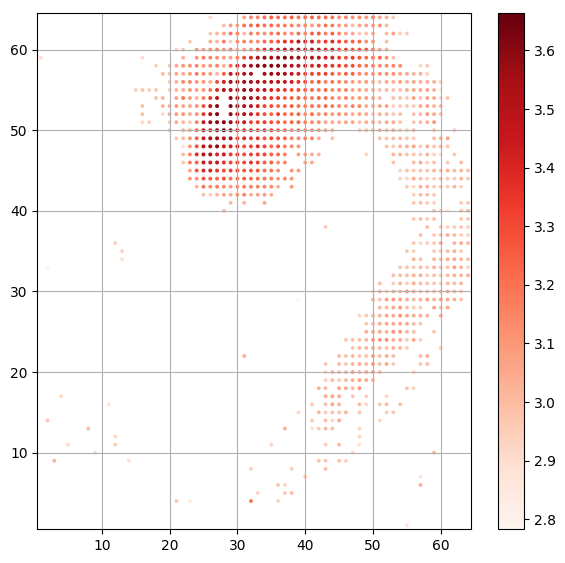

In [58]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=hetas, c=hetas, cmap="Reds")
colorbar()
grid()

In [59]:
hetacut=quantile(hetas, 0.90)
tuabueta=findall(x->x>hetacut,hetas);
auxchans=hcat(orderchans[tuabueta,:], hetas[tuabueta])
naux=size(auxchans,1)

105

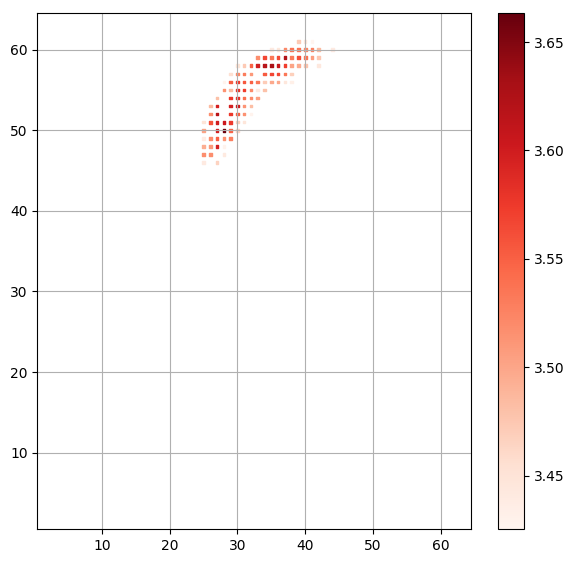

In [60]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(auxchans[:,2], auxchans[:,1], s=auxchans[:,4], 
    c=auxchans[:,4],marker="s", cmap="Reds")
colorbar()
grid()

In [61]:
imutres=zeros(nchan)
refe=[50,28]
fijo=lfp[refe[1], refe[2],:]
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    imutres[j]=infomutua(fijo, ejemplo)
end

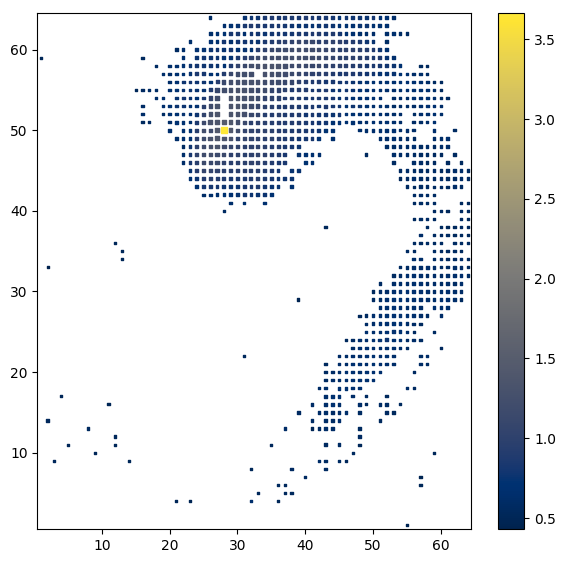

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd576239358>

In [62]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=imutres.*5, c=imutres, cmap="cividis", marker="s")
colorbar()
#grid()

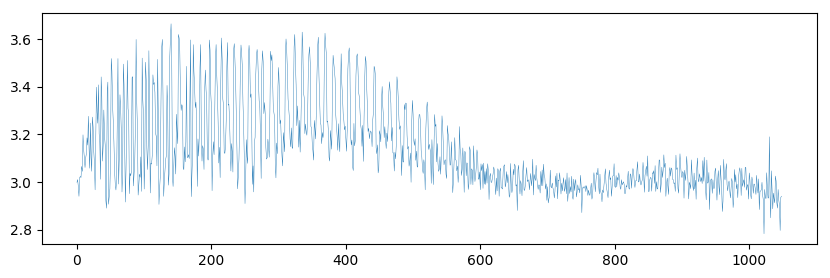

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd57631fac8>

In [63]:
figure(figsize=(10,3))
plot(hetas, lw=0.3)

In [64]:
mutinfo=zeros(naux,naux);
crossentro=zeros(naux,naux)

@time for j=1:naux
    for k=j:naux
        
        reng1,col1=(auxchans[j,1], auxchans[j,2])
        reng2,col2=(auxchans[k,1], auxchans[k,2])
        
        reng1=round(Int32, reng1)
        reng2=round(Int32, reng2)
        
        col1=round(Int32, col1)
        col2=round(Int32, col2)
        
        
        
        dat1=lfp[reng1, col1,:]
        dat2=lfp[reng2, col2,:]
        
        mutinfo[j,k]=infomutua(dat1,dat2)
        mutinfo[k,j]=mutinfo[j,k]
    
    end
end

  5.966175 seconds (277.01 k allocations: 3.476 GiB, 2.68% gc time)


In [65]:
for j=1:naux
    mutinfo[j,j]=0
end

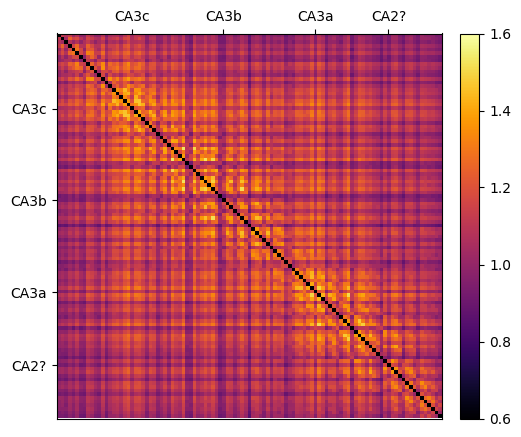

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd5789ccda0>

In [66]:
figure(figsize=(6,5))

imshow(mutinfo, cmap="inferno", interpolation="nearest", vmin=0.6, vmax=1.6)

#onde=[55, 125, 200, 250]
onde=[20, 45, 70, 90]
que=["CA3c","CA3b", "CA3a", "CA2?" ]
tick_params(bottom=false, top=true)
xticks(onde, que)
yticks(onde, que)
tick_params(bottom=false, top=true, labeltop=true, labelbottom=false)

colorbar(fraction=0.046, pad=0.04)

In [67]:
?crossentropy

search: crossentropy crossentro



```
crossentropy(p, q, [b])
```

Compute the cross entropy between `p` and `q`, optionally specifying a real number `b` such that the result is scaled by `1/log(b)`.
